In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [2]:
df_peng = sns.load_dataset("penguins")

In [3]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
cols_num = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
peng_std = ss.fit_transform(df_peng[cols_num].dropna())
peng_std

array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.18828874, -0.73592307,  1.50164406,  1.93341896],
       [ 0.23443963, -1.19233476,  0.7894512 ,  1.24658968],
       [ 1.09657248, -0.53307343,  0.86067049,  1.49634578]])

In [4]:
from sklearn.decomposition import PCA

pca = PCA()
peng_pca = pca.fit_transform(peng_std)

<AxesSubplot:>

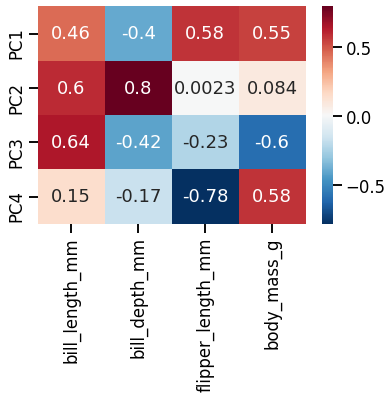

In [5]:
ticklabels = [f"PC{i+1}" for i in range(peng_pca.shape[1])]

sns.heatmap(pca.components_, annot=True, cmap="RdBu_r", 
            xticklabels=cols_num, yticklabels=ticklabels)


<AxesSubplot:>

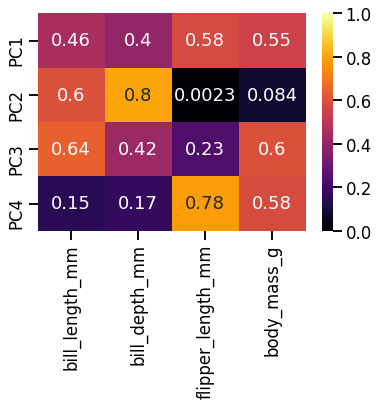

In [6]:
pca_comp_abs = abs(pca.components_)
sns.heatmap(pca_comp_abs, annot=True, cmap="inferno", vmin=0, vmax=1,
            xticklabels=cols_num, yticklabels=ticklabels)

[<matplotlib.patches.Rectangle object at 0x7f4679743c50>, <AxesSubplot:>, <AxesSubplot:label='<colorbar>'>]


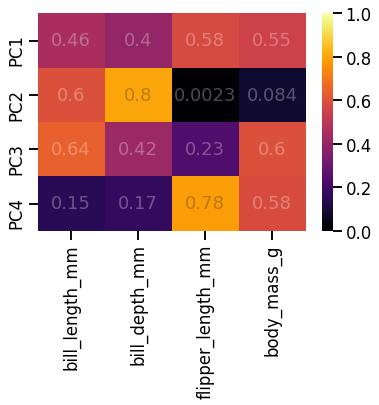

In [7]:
ax = sns.heatmap(pca_comp_abs, annot=True, cmap="inferno", vmin=0, vmax=1,
                 xticklabels=cols_num, yticklabels=ticklabels, annot_kws={"alpha":0.3})
fig = ax.figure

print(fig.get_children())

In [8]:
cbar = fig.get_children()[-1]
print(type(cbar))

<class 'matplotlib.axes._subplots.AxesSubplot'>


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Use the colorbar set_ticks() method instead.
  """Entry point for launching an IPython kernel.


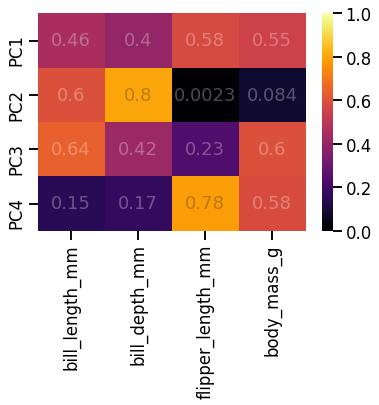

In [9]:
cbar.set_yticks([-0.5, 0, 0.5])
display(fig)

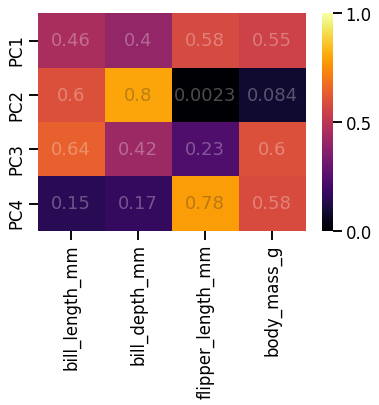

In [10]:
# cbar = fig.get_children()[-1]
cbar.yaxis.set_ticks([0, 0.5, 1])
display(fig)

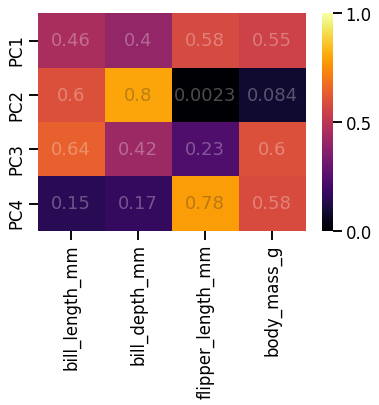

In [11]:
from matplotlib.ticker import MultipleLocator

ax = sns.heatmap(pca_comp_abs, annot=True, cmap="inferno", vmin=0, vmax=1,
                 xticklabels=cols_num, yticklabels=ticklabels, annot_kws={"alpha":0.3})
fig = ax.figure
cbar = fig.get_children()[-1]
cbar.yaxis.set_major_locator(MultipleLocator(0.5)) 


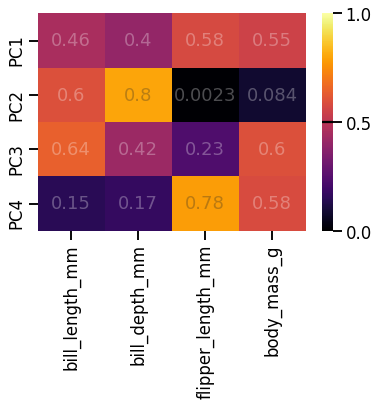

In [12]:
cbar.axhline(-0.5, c="k")
cbar.axhline(0, c="k")
cbar.axhline(0.5, c="k")
    
display(fig)

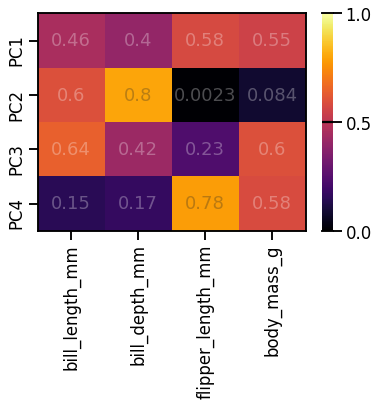

In [13]:
ax.spines[["bottom", "top", "left", "right"]].set_visible(True)
cbar.spines[["bottom", "top"]].set_visible(True)
cbar.spines[["bottom", "top"]].set_color("k")
cbar.axhline(0, c="k")

display(fig)